In [136]:
#imports
!wget "https://drive.google.com/uc?export=download&id=14-ZWnwEM8hNl8v_Ox5JunO4ChdOGSidK" -O housing.csv
!pip install contextily
import contextily as ctx
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

--2024-08-20 18:16:20--  https://drive.google.com/uc?export=download&id=14-ZWnwEM8hNl8v_Ox5JunO4ChdOGSidK
Resolving drive.google.com (drive.google.com)... 142.251.167.138, 142.251.167.100, 142.251.167.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.167.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=14-ZWnwEM8hNl8v_Ox5JunO4ChdOGSidK&export=download [following]
--2024-08-20 18:16:20--  https://drive.usercontent.google.com/download?id=14-ZWnwEM8hNl8v_Ox5JunO4ChdOGSidK&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c17::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1195690 (1.1M) [application/octet-stream]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.14M  --.-KB/

#Question1

#Question2

#(also added the 'cost_per_sqft' column to the dataframe.)

In [137]:
housing_data = pd.read_csv('housing.csv')
housing_data['cost_per_sqft'] = housing_data['median_house_value'] /housing_data['total_rooms']
print(housing_data)

rows_columns = housing_data.shape
print(rows_columns)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

#Question 3

#The mean and median for each column is displayed.

#The median is displayed as the 50th percentile, or 50%.

In [138]:
print(housing_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

#Question 4

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

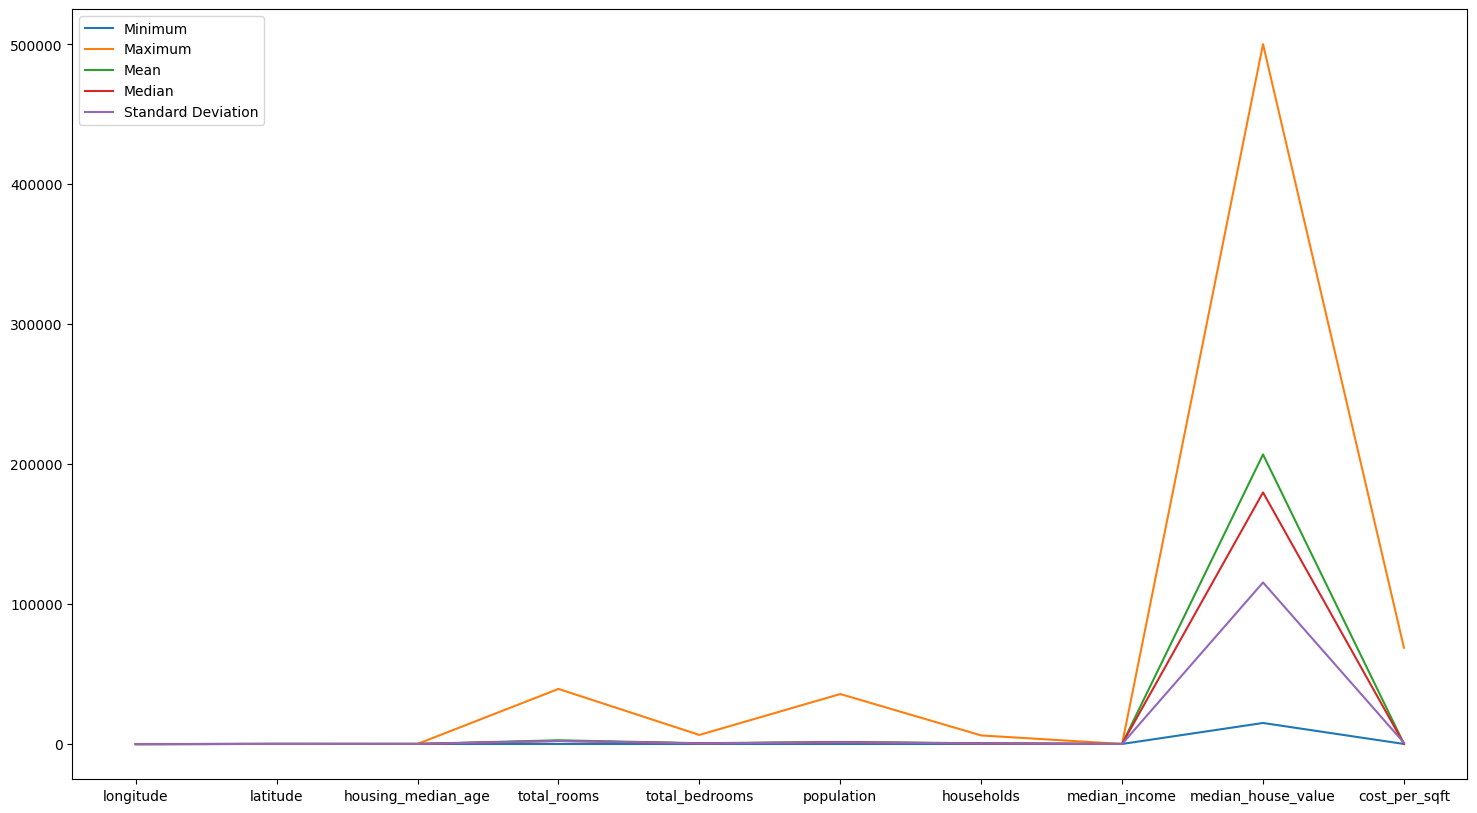

In [139]:
housing_data_new = housing_data.drop('ocean_proximity', axis=1)
print(housing_data_new)

my_cols = housing_data_new.columns.tolist()
df2 = housing_data_new[my_cols]

'''housing_data_new is the dataframe with the 'ocean_proximity' parameter removed, since we
couldn't find the mean, median, mode etc for it because the data stored in it is string.'''

plt.figure(figsize=(18, 10))

a = df2.min()
print("MIN STATS")
print(a)
plt.plot(my_cols, a)
#aa = a.plot()

b = df2.max()
print("\nMAX STATS")
print(b)
plt.plot(my_cols, b)
#bb = b.plot()

c = df2.mean()
print("\nMEAN STATS")
print(c)
plt.plot(my_cols, c)
#cc = c.plot()

d = df2.median()
print("\nMEDIAN STATS")
plt.plot(my_cols, d)
print(d)
#dd = d.plot()

e = df2.std()
print("\nSTD DEV STATS")
plt.plot(my_cols, e)
print(e)
#ee = e.plot()

plt.legend(['Minimum', 'Maximum', 'Mean', 'Median', 'Standard Deviation'])
plt.show()

#Question 5

In [140]:
missing_values = housing_data.isna().sum()
print("The no. of missing values in each column are: ")
print(missing_values)

housing_data_filled = housing_data.fillna(d)

print("\nOriginal DataFrame:")
print(housing_data)
print("\nDataFrame after replacing missing values with median:")
print(housing_data_filled)

The no. of missing values in each column are: 
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
cost_per_sqft           0
dtype: int64

Original DataFrame:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
2

#Question 6

The plot of the column 'total_bedrooms' before replacing the missing values with the median is: 


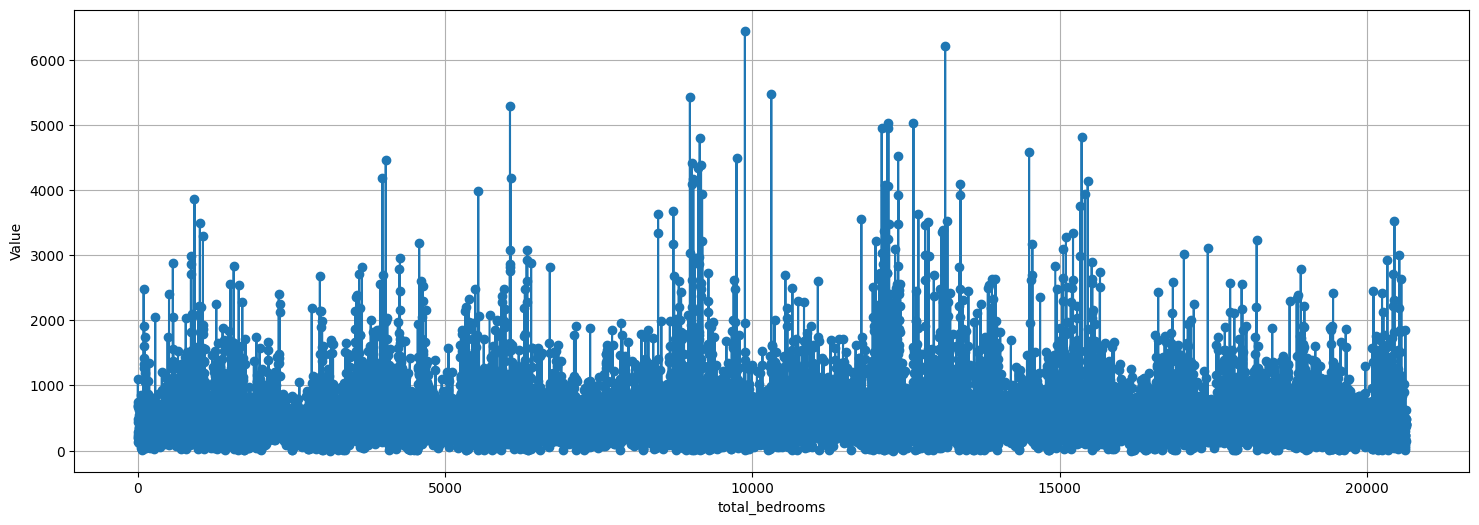

The plot of the column 'total_bedrooms' after replacing the missing values with the median is: 


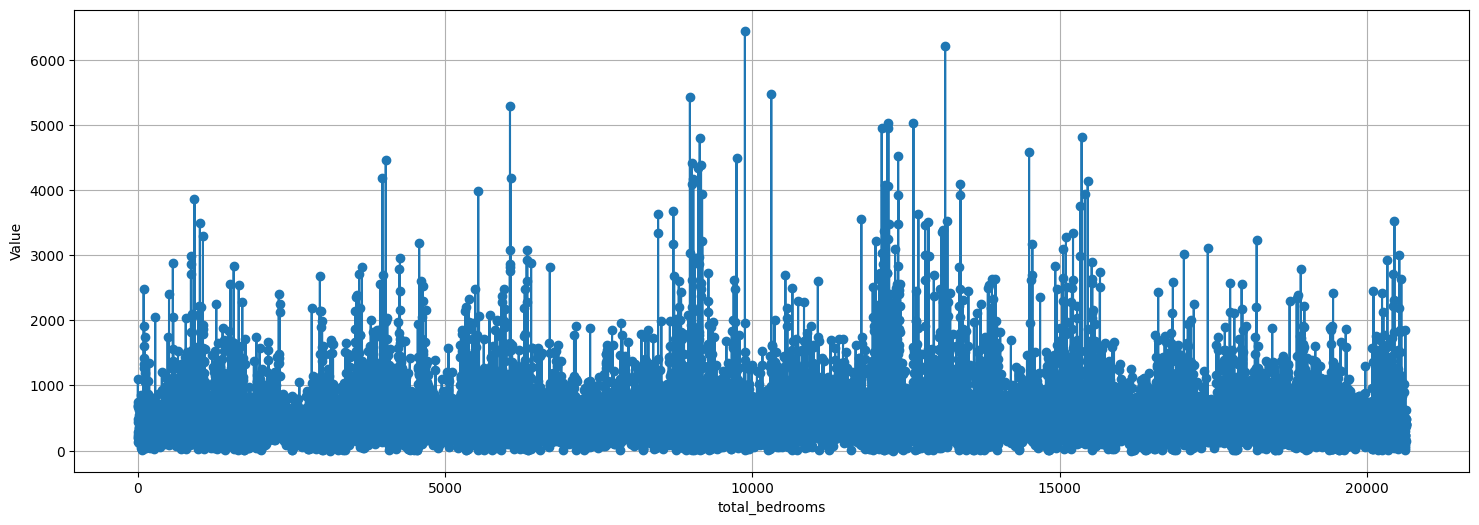

In [141]:
def data_transformer_using_mid(housing_data, condition):
  print(f"The plot of the column 'total_bedrooms' {condition} replacing the missing values with the median is: ")
  plt.figure(figsize=(18, 6))
  plt.plot(housing_data.index, housing_data['total_bedrooms'], marker='o')
  plt.xlabel('total_bedrooms')
  plt.ylabel('Value')
  plt.grid(True)
  plt.show()
data_transformer_using_mid(housing_data,"before")

data_transformer_using_mid(housing_data_filled,"after")

#Question 7

In [142]:
housing_data.drop_duplicates()
housing_data.shape

(20640, 11)

#Question 8

<Figure size 2500x1800 with 0 Axes>

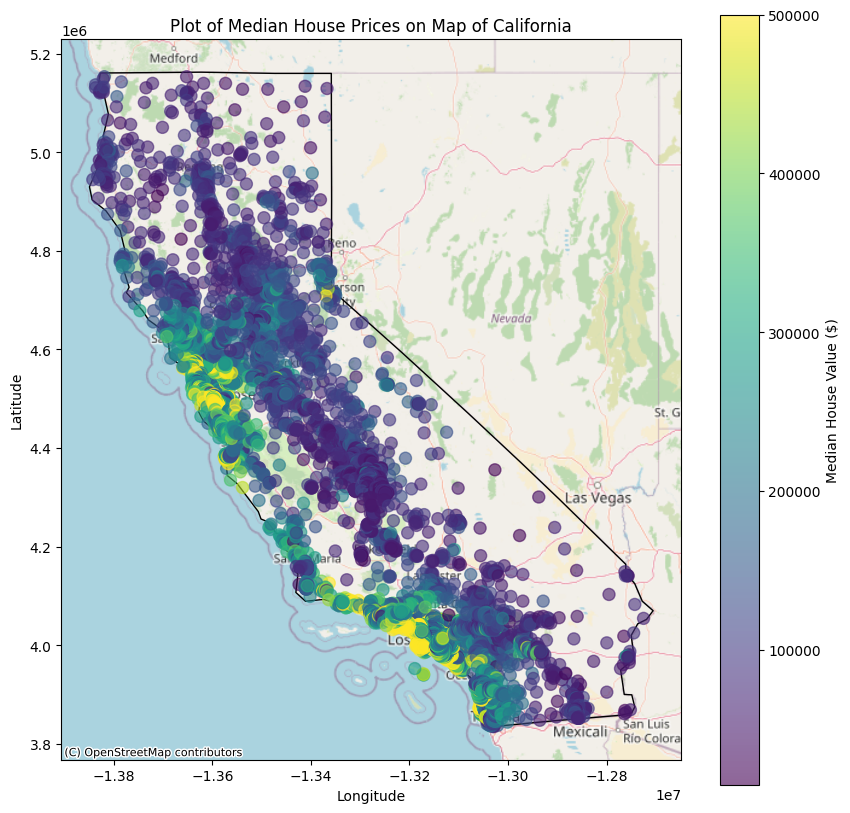

In [143]:
plt.figure(figsize=(25, 18))
# Load California shapefile from Natural Earth directly or another source
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/CA.geo.json"
california = gpd.read_file(url)


# Create a GeoDataFrame from the sample data
gdf = gpd.GeoDataFrame(housing_data, geometry=gpd.points_from_xy(housing_data['longitude'], housing_data['latitude']), crs="EPSG:4326")

# Project the GeoDataFrame and California map to Web Mercator (EPSG:3857)
california = california.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the California map
california.plot(ax=ax, color='none', edgecolor='black')

# Overlay the scatter plot on the map with proper scaling
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf['median_house_value'], cmap='viridis', s=75, alpha=0.6)

# Add a basemap with contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Add colorbar
plt.colorbar(scatter, ax=ax, label='Median House Value ($)')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Plot of Median House Prices on Map of California')

# Show the plot
plt.show()

#Question 9

In [144]:
# Number of houses with more than 1500 total bedrooms
print(housing_data[housing_data['total_bedrooms'] >= 1500].shape[0])

# Number of houses with median income more than 10
print(housing_data[housing_data['median_income'] >= 10].shape[0])

# Number of houses with population more than 1000
print(housing_data[housing_data['population'] >= 1000].shape[0])

# Number of houses with median house value more than 250000
print(housing_data[housing_data['median_house_value'] >= 250000].shape[0])

654
309
12497
5829


#Question 10

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


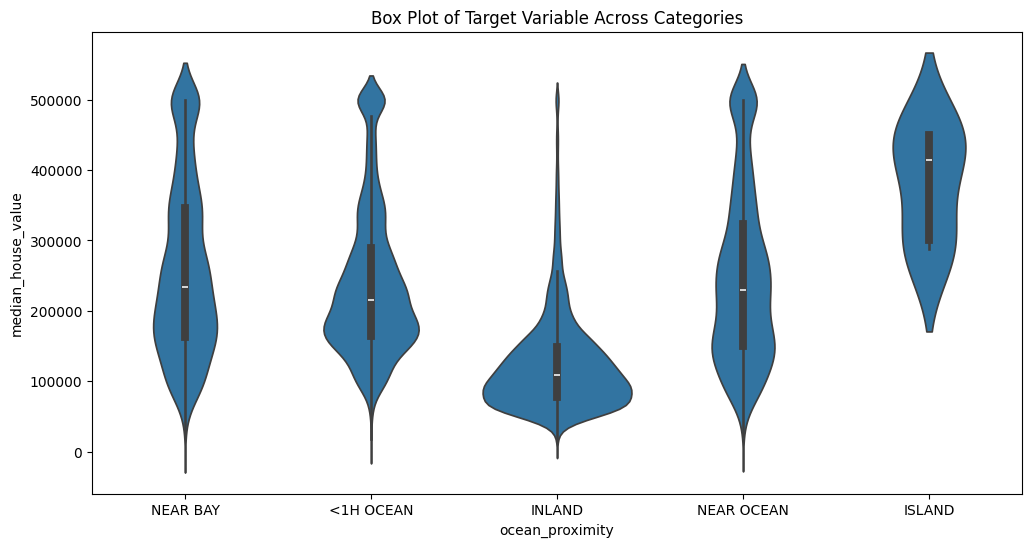

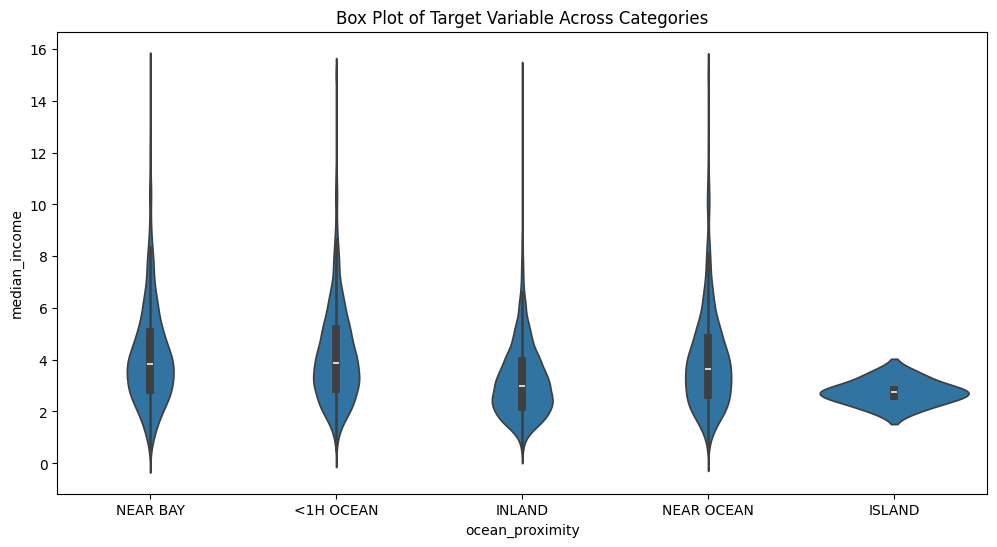


The custom encoding values are as follows: <1H OCEAN = 1, INLAND = 2, NEAR OCEAN = 3, NEAR BAY = 4, ISLAND = 5
0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: ocean_proximity, Length: 20640, dtype: float64


In [145]:
#10.1
ocean_proxy_data = housing_data['ocean_proximity'].value_counts()
print(ocean_proxy_data)

#10.2
plt.figure(figsize=(12, 6))
sns.violinplot(x='ocean_proximity', y='median_house_value', data=housing_data)
plt.title('Box Plot of Target Variable Across Categories')
plt.xlabel('ocean_proximity')
plt.ylabel('median_house_value')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='ocean_proximity', y='median_income', data=housing_data)
plt.title('Box Plot of Target Variable Across Categories')
plt.xlabel('ocean_proximity')
plt.ylabel('median_income')
plt.show()

#10.3
custom_encoding = {'<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN ': 3, 'NEAR BAY':4, 'ISLAND':5}
housing_data_encoded = housing_data['ocean_proximity'].map(custom_encoding)
print("\nThe custom encoding values are as follows: <1H OCEAN = 1, INLAND = 2, NEAR OCEAN = 3, NEAR BAY = 4, ISLAND = 5")
print(housing_data_encoded)

#Question 11

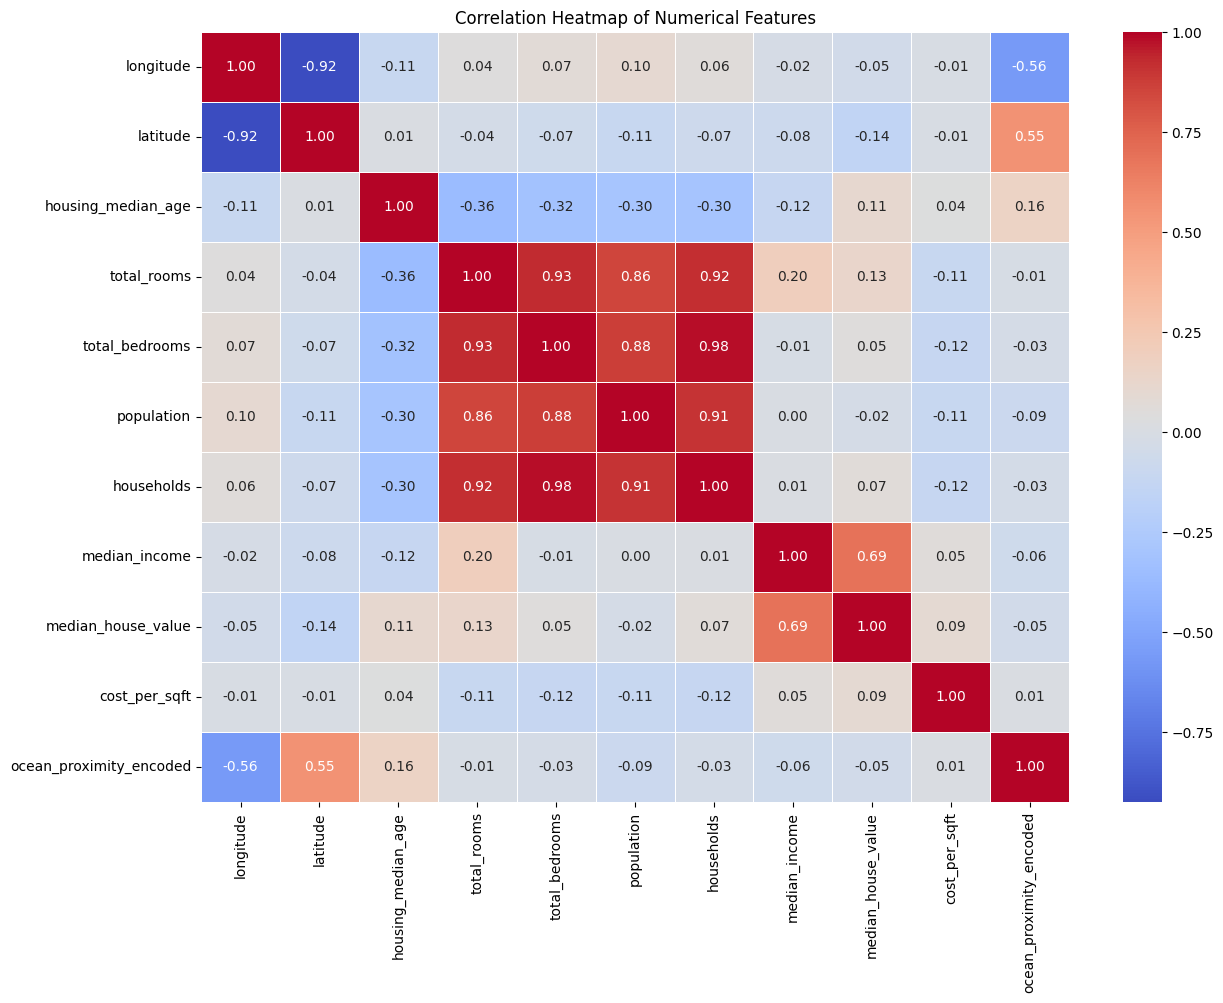

In [146]:
housing_data['ocean_proximity_encoded'] = housing_data['ocean_proximity'].map(custom_encoding)

numerical_features = housing_data.select_dtypes(include=['number'])
corr_matrix = numerical_features.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#Question 11 (continued)

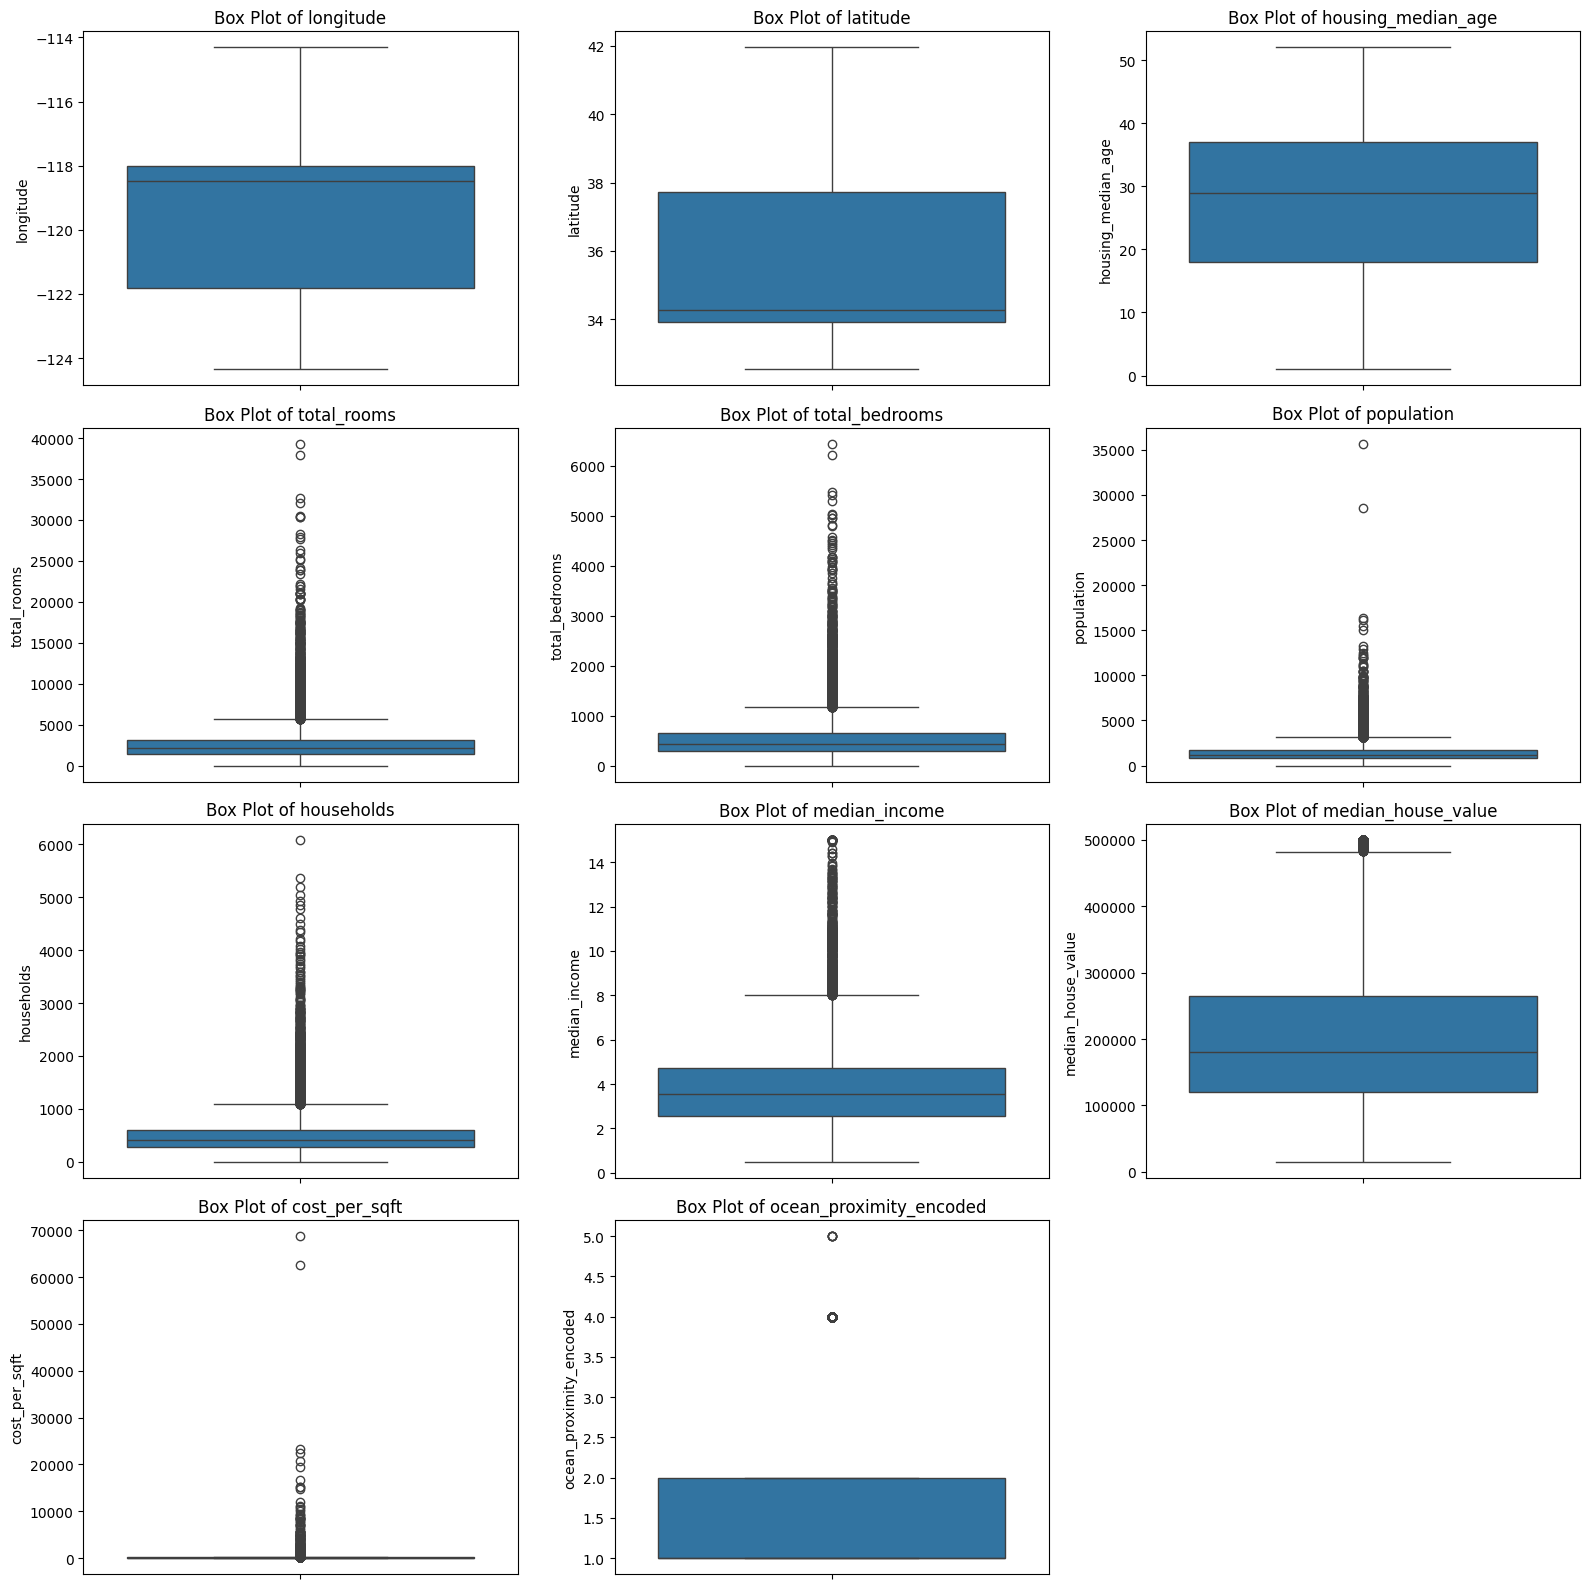

In [147]:

plt.figure(figsize=(16, 16))

for i, feature in enumerate(numerical_features.columns, 1):
    plt.subplot(len(numerical_features.columns)//3+1, 3, i)
    sns.boxplot(y=housing_data[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

#Question 11 (continued)

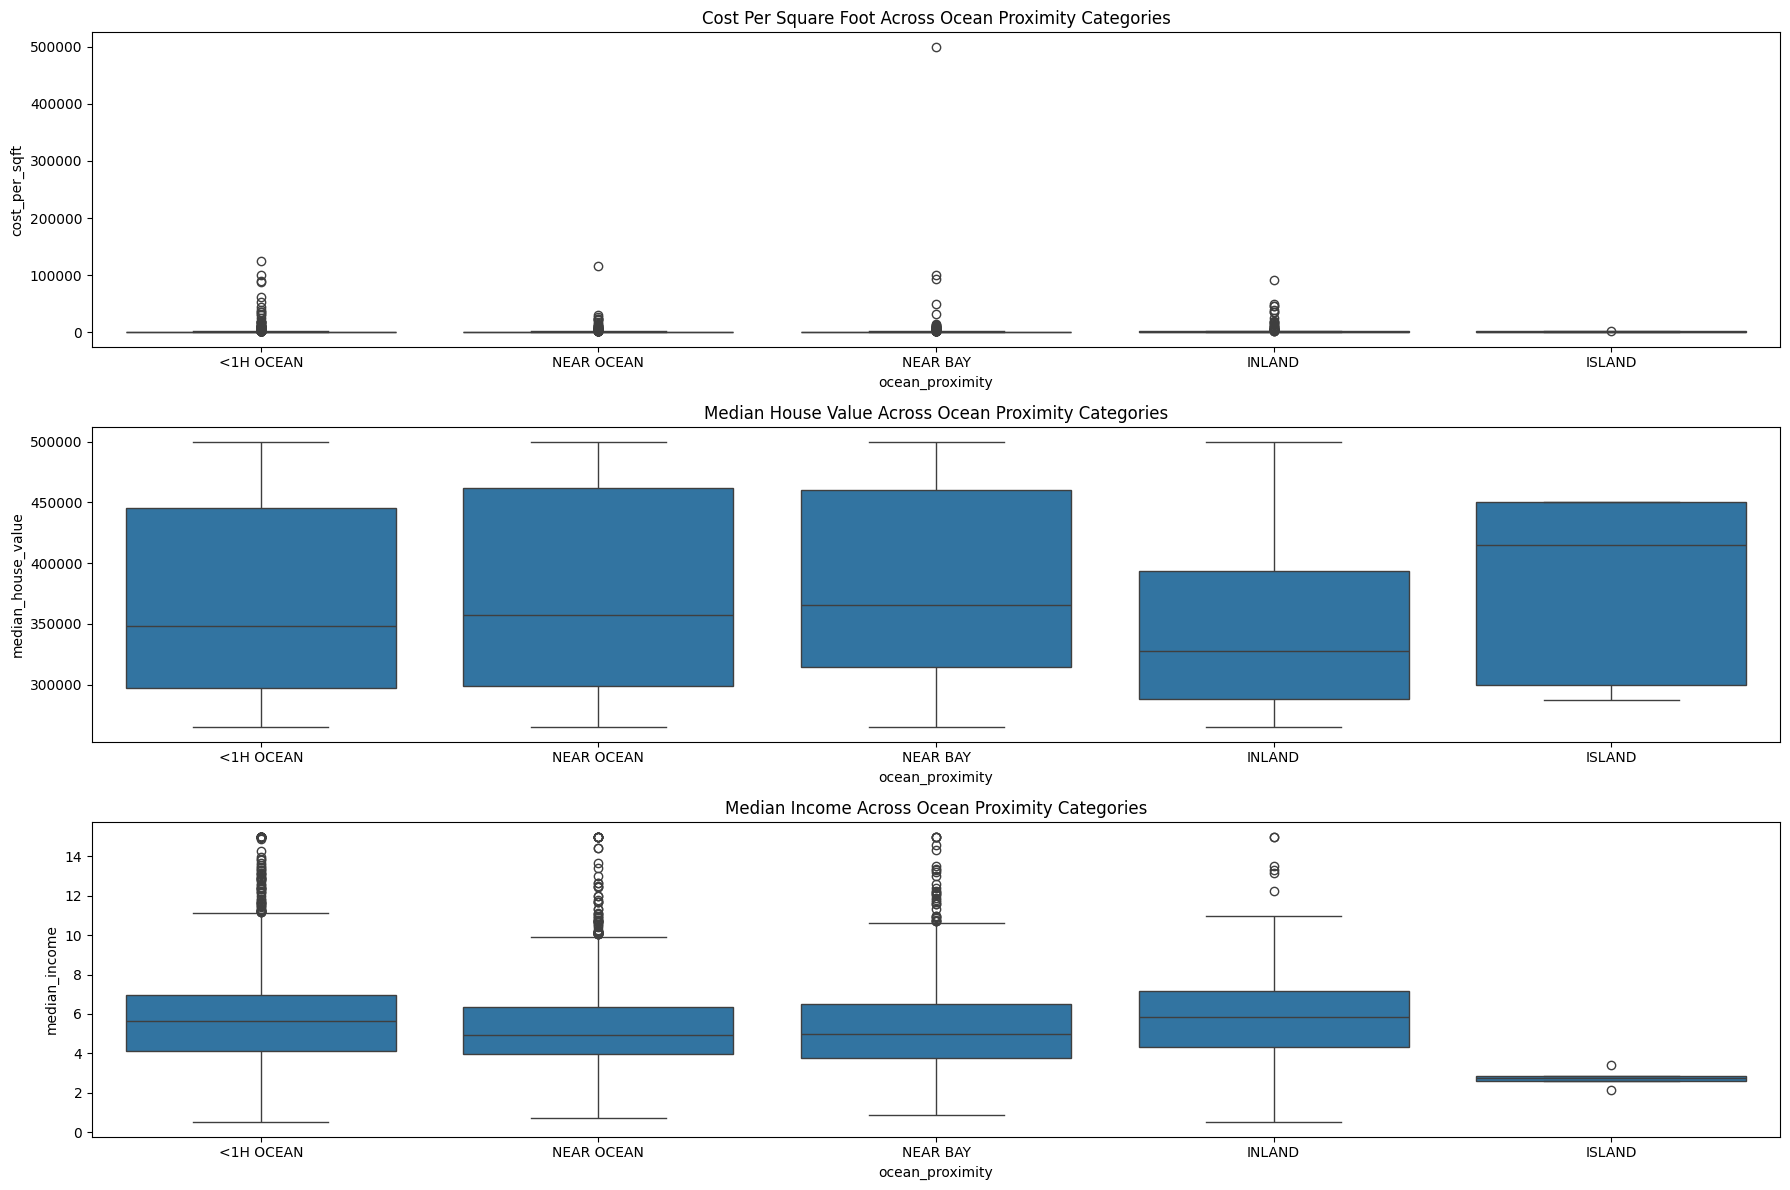

In [148]:
housing_data['cost_per_sqft'] = housing_data['median_house_value'] / housing_data['households']

#We create a new dataframe consisting of the premium top houses, i.e the top 25% of houses by median house value.

sorted_df2 = housing_data.sort_values(by='median_house_value', ascending = False)
top_25_percent = top_25_percent = int(len(housing_data) * 0.25)
top_25_df = sorted_df2.head(top_25_percent)

plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
sns.boxplot(x='ocean_proximity', y='cost_per_sqft', data=top_25_df)
plt.title('Cost Per Square Foot Across Ocean Proximity Categories')

plt.subplot(3, 1, 2)
sns.boxplot(x='ocean_proximity', y='median_house_value', data=top_25_df)
plt.title('Median House Value Across Ocean Proximity Categories')

plt.subplot(3, 1, 3)
sns.boxplot(x='ocean_proximity', y='median_income', data=top_25_df)
plt.title('Median Income Across Ocean Proximity Categories')

plt.tight_layout()
plt.show()

#Question 12

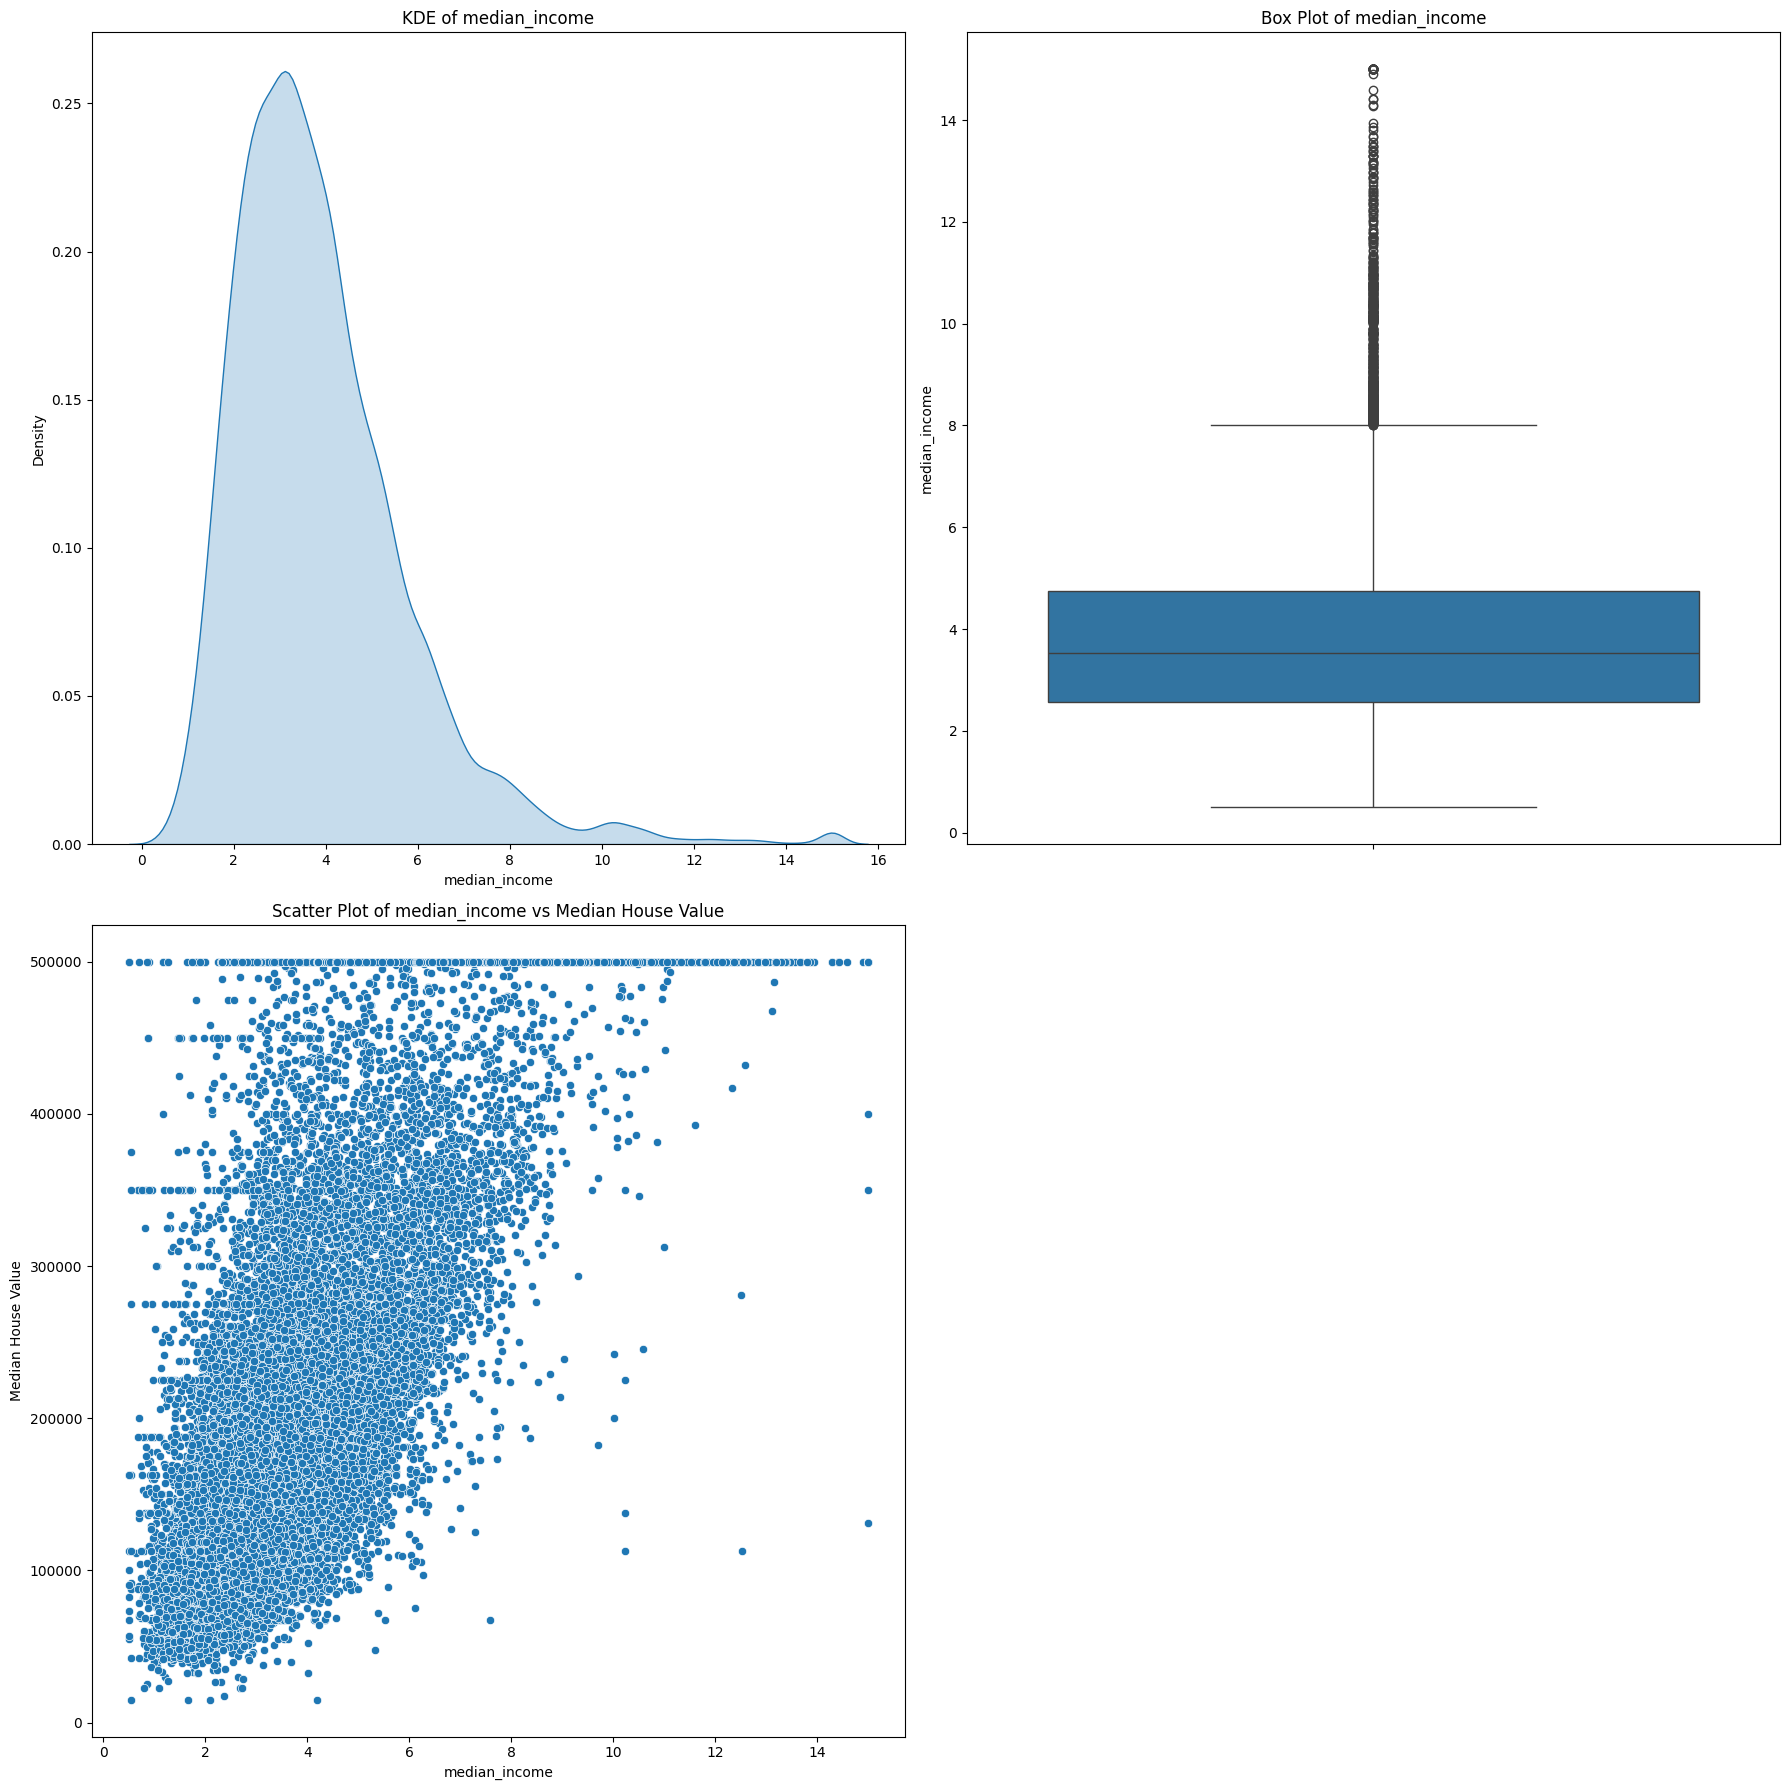

In [149]:
plt.figure(figsize=(18, 18))

plt.subplot(2, 2, 1)
sns.kdeplot(housing_data['median_income'], fill=True)
plt.title('KDE of median_income')
plt.xlabel('median_income')
plt.ylabel('Density')

plt.subplot(2, 2, 2)
sns.boxplot(y=housing_data['median_income'])
plt.title('Box Plot of median_income')
plt.ylabel('median_income')

plt.subplot(2, 2, 3)
sns.scatterplot(x=housing_data['median_income'], y=housing_data['median_house_value'])
plt.title('Scatter Plot of median_income vs Median House Value')
plt.xlabel('median_income')
plt.ylabel('Median House Value')

plt.tight_layout()
plt.show()


#Question 13

Lower Bound: -23935.41483991299
Upper Bound: 437647.04865774245
Total Number of Outliers: 1383
       median_house_value
0                  452600
89                 500001
140                483300
459                500001
489                489600
...                   ...
20422              500001
20426              500001
20427              500001
20436              500001
20443              500001

[1383 rows x 1 columns]


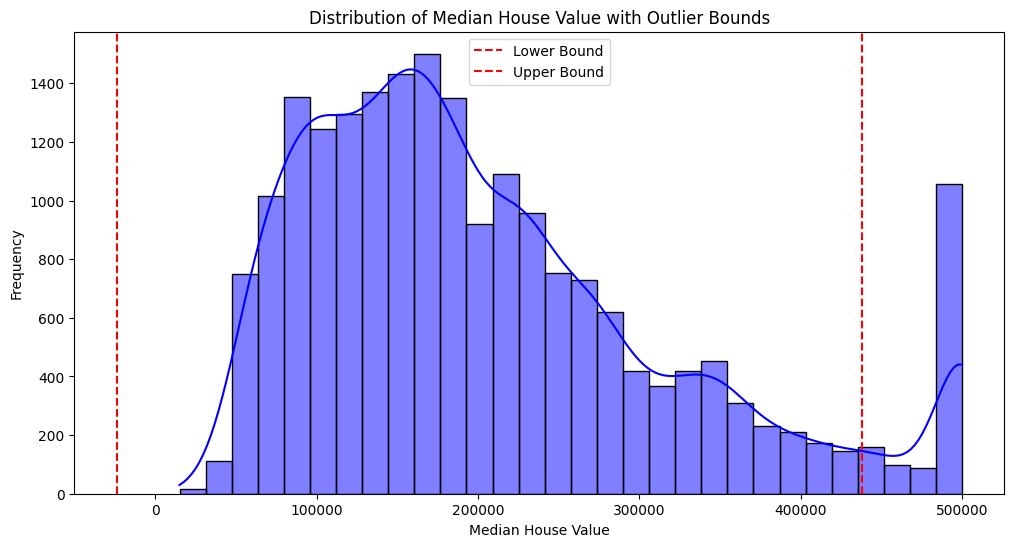

In [150]:
mean_value = housing_data['median_house_value'].mean()
std_dev_value = housing_data['median_house_value'].std()
lower_bound = mean_value - 2 * std_dev_value
upper_bound = mean_value + 2 * std_dev_value

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
outliers = housing_data[(housing_data['median_house_value'] < lower_bound) | (housing_data['median_house_value'] > upper_bound)]
total_outliers = outliers.shape[0]

print(f"Total Number of Outliers: {total_outliers}")
print(outliers[['median_house_value']])
plt.figure(figsize=(12, 6))
sns.histplot(housing_data['median_house_value'], kde=True, color='blue', bins=30)
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title('Distribution of Median House Value with Outlier Bounds')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#Question 14

In [151]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer

numerical_features = housing_data.select_dtypes(include=['float64', 'int64']).columns

standard_scaler = StandardScaler()
housing_data_standard_scaled = housing_data.copy()
housing_data_standard_scaled[numerical_features] = standard_scaler.fit_transform(housing_data[numerical_features])

minmax_scaler = MinMaxScaler()
housing_data_minmax_scaled = housing_data.copy()
housing_data_minmax_scaled[numerical_features] = minmax_scaler.fit_transform(housing_data[numerical_features])

robust_scaler = RobustScaler()
housing_data_robust_scaled = housing_data.copy()
housing_data_robust_scaled[numerical_features] = robust_scaler.fit_transform(housing_data[numerical_features])

quantile_transformer = QuantileTransformer()
housing_data_quantile_transformer = housing_data.copy()
housing_data_quantile_transformer[numerical_features] = quantile_transformer.fit_transform(housing_data[numerical_features])

power_transformer = PowerTransformer()
housing_data_power_transformer = housing_data.copy()
housing_data_power_transformer[numerical_features] = power_transformer.fit_transform(housing_data[numerical_features])


print("Standard Scaled Data (first few rows):\n", housing_data_standard_scaled.head())
print("\nMinMax Scaled Data (first few rows):\n", housing_data_minmax_scaled.head())
print("\nRobust Scaled Data (first few rows):\n", housing_data_robust_scaled.head())
print("\nQuantile Transformed Data (first few rows):\n", housing_data_quantile_transformer.head())
print("\nPower Transformed Data (first few rows):\n", housing_data_power_transformer.head())


print("Original Data Range:")
print(housing_data[numerical_features].agg(['min', 'max']))
print("\nStandardScaler Data Range (approximate):")
print(housing_data_standard_scaled[numerical_features].agg(['min', 'max']))
print("\nMinMaxScaler Data Range:")
print(housing_data_minmax_scaled[numerical_features].agg(['min', 'max']))


Standard Scaled Data (first few rows):
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.970325   
1  -1.322844  1.043185           -0.607019     2.045890        1.348276   
2  -1.332827  1.038503            1.856182    -0.535746       -0.825561   
3  -1.337818  1.038503            1.856182    -0.624215       -0.718768   
4  -1.337818  1.038503            1.856182    -0.462404       -0.611974   

   population  households  median_income  median_house_value ocean_proximity  \
0   -0.974429   -0.977033       2.344766            2.129631        NEAR BAY   
1    0.861439    1.669961       2.332238            1.314156        NEAR BAY   
2   -0.820777   -0.843637       1.782699            1.258693        NEAR BAY   
3   -0.766028   -0.733781       0.932968            1.165100        NEAR BAY   
4   -0.759847   -0.629157      -0.012881            1.172900        NEAR BAY   

   cost_per_sqft  ocean_prox